1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

The correlation values are:
- Correlation of features_1/features_2: -0.005219711383220027
- Correlation of features_1/features_2: 0.02369042507320443
- Correlation of features_2/features_3: 0.04735993943504082 

The features are not correlated.


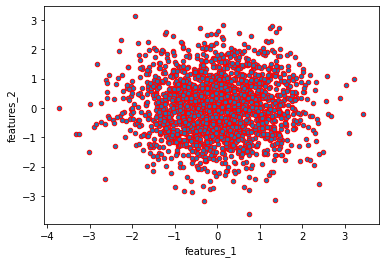

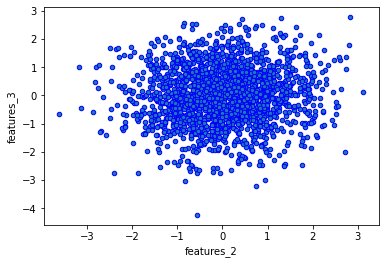

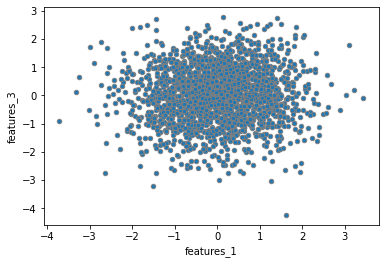

In [27]:
#1-Spotting correlations

#!wget https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv

import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv("regression_generated.csv")

ax1 = data.plot.scatter(x='features_1', y='features_2', edgecolors = 'red')
ax2 = data.plot.scatter(x='features_2', y='features_3', edgecolors = 'blue')
ax3 = data.plot.scatter(x='features_1', y='features_3', edgecolors = 'gray')

#Correlation
print("The correlation values are:")
print("- Correlation of features_1/features_2:", data["features_1"].corr(data["features_2"]))
print("- Correlation of features_1/features_2:", data["features_1"].corr(data["features_3"]))
print("- Correlation of features_2/features_3:", data["features_2"].corr(data["features_3"]), "\n")

print("The features are not correlated.")


2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

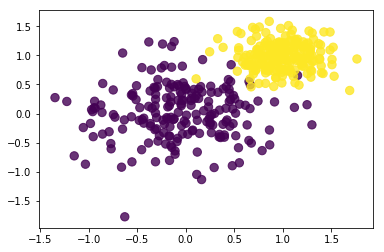

In [3]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

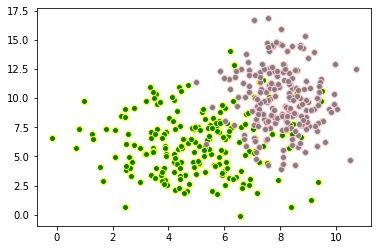

In [49]:
#2-Color-coded scatter plot

import numpy as np

#First gaussian distribution
mean = (5, 6)
cov = [[3, 0], [0, 7]]
cat1=np.random.multivariate_normal(mean, cov, 200)
x=[]
y=[]
for el in cat1:
    x.append(el[0])
    y.append(el[1])
plt.scatter(x, y,edgecolor = 'yellow', color = 'green')

#Second gaussian distribution
mean = (8, 10)
cov = [[1,0], [0, 8]]
cat2=np.random.multivariate_normal(mean, cov, 200)

x=[]
y=[]
for el in cat2:
    x.append(el[0])
    y.append(el[1])
plt.scatter(x, y, edgecolor = 'pink', color = 'gray')
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

X array:
[ 0.83333333  2.5         4.16666667  5.83333333  7.5         9.16666667
 10.83333333 12.5        14.16666667 15.83333333 17.5        19.16666667
 20.83333333 22.5        24.16666667]

Y array:
[-0.19121409 -0.16524649 -0.136472   -0.12858998 -0.08225938 -0.0986224
 -0.06823558 -0.09576672 -0.13752665 -0.12755093 -0.16117397 -0.08168838
  0.0445752   0.09428571  0.36047619]

Y errors array:
[0.4650168  0.40956283 0.40609345 0.42818694 0.43703932 0.41852454
 0.45196948 0.49425753 0.45733719 0.45586764 0.41596622 0.3922764
 0.46746555 0.09293403 1.18338526]



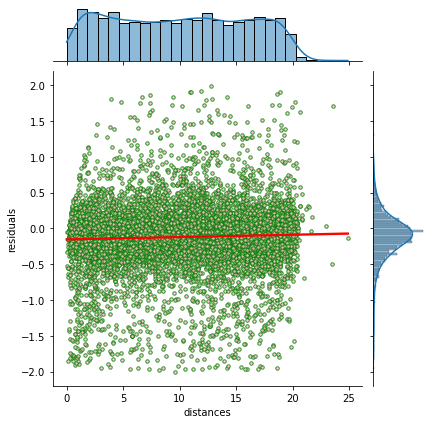

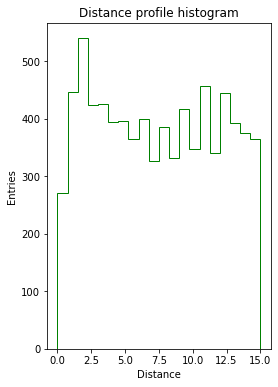

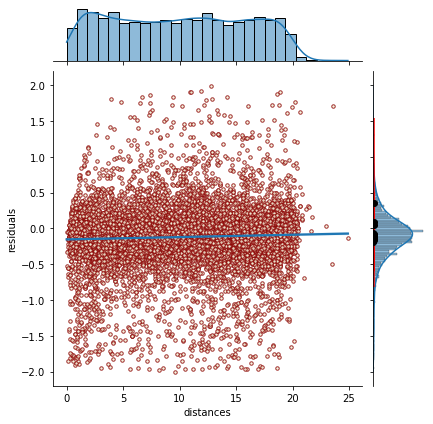

In [66]:
#3-Profile plot

#!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

import pickle

filename = "residuals_261.pkl"
infile = open(filename, "rb")
tdict = pickle.load(infile).item()
infile.close()

df = pd.DataFrame(tdict)
df = df[abs(df.loc[:, "residuals"]) < 2]

# Seaborn jointplot
sns.jointplot(x="distances", y="residuals", data=df, kind="reg", joint_kws={"scatter_kws":{"color":"pink", "edgecolors":"green", "s":12}, "line_kws":{"color":"r"}})

#Plotting manually the distance histogram
fig = plt.figure(figsize=(4, 6)) # create the figure and the axes
plt.hist(df["distances"], range=(0, 15), bins=20, histtype="step", color="green")
ax = fig.axes[0]
ax.set_title("Distance profile histogram")
ax.set_xlabel("Distance")
ax.set_ylabel("Entries")

#The x, y err_y arrays
aux = np.linspace(0, 25, 16)
x = np.array((aux[0:15]+aux[1:16])/2)

# y as mean, err_y as std deviation of the values contained in a bin
dux = np.digitize(df["distances"], aux)
y = np.zeros(15)
err_y = np.zeros(15)
for i in range(15):
    y[i] += [df["residuals"][dux == i+1].mean(),]
    err_y[i] += [df["residuals"][dux == i+1].std(),]

print("X array:")
print(str(x) + "\n")
print("Y array:")
print(str(y) + "\n")
print("Y errors array:")
print(str(err_y) + "\n")

# Overlap jointplot-y with errorbars
sns.jointplot(x="distances", y="residuals", data=df, kind="reg", joint_kws={"scatter_kws":{"color":"beige", "edgecolors":"darkred", "s":12}})
plt.errorbar(x=x, y=y, yerr=erry, ecolor="r", fmt="ko")

plt.show()

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


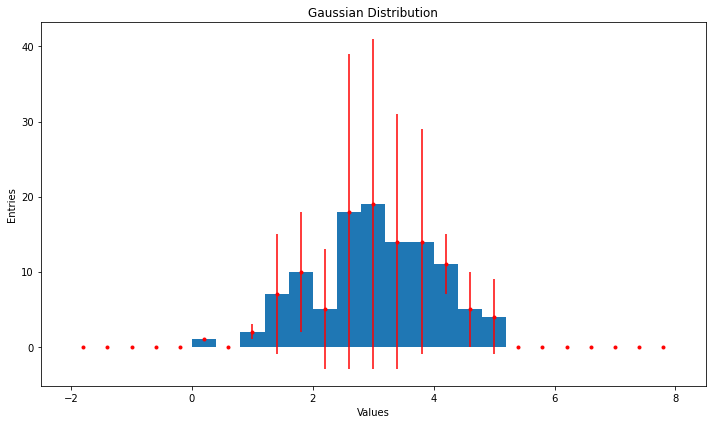

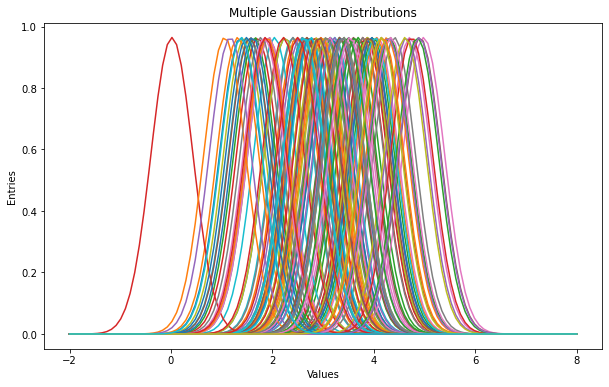

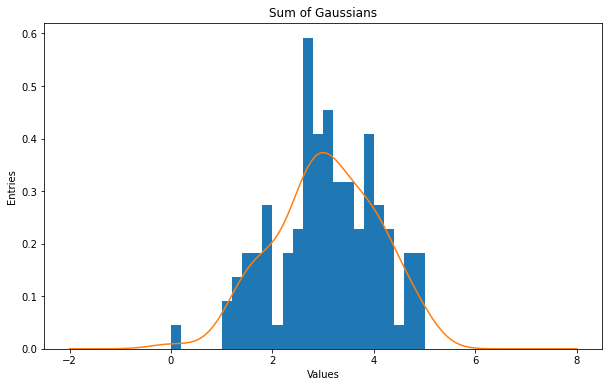

In [63]:
#4-Kernel Density Estimate

import scipy
import numpy as np
import matplotlib.pyplot as plt

x = np.random.normal(3,1,110)
menStd = np.sqrt(x)
fig = plt.figure(figsize=(10, 6)) 
entries, edges, _ = plt.hist(x, bins=25, range=(-2,8))
bin_centers = 0.5 * (edges[:-1] + edges[1:])
plt.errorbar(bin_centers, entries, yerr=np.random.poisson(entries,25), fmt='r.')
ax = fig.axes[0]
ax.set_title('Gaussian Distribution')
ax.set_xlabel('Values')
ax.set_ylabel('Entries')
fig.tight_layout()
plt.show()

cum=np.zeros(110)
a=[]
fig = plt.figure(figsize=(10, 6)) 
std=1.06*scipy.stats.tstd(x)*(110)**(-0.2)

for el in x:
    t =np.linspace(-2, 8, 110)
    a.append(scipy.stats.norm.pdf(t,el,std) )
    plt.plot(t,a[-1])
    
ax = fig.axes[0]
ax.set_title('Multiple Gaussian Distributions')
ax.set_xlabel('Values')
ax.set_ylabel('Entries')
plt.show()

for val in a:
    for el in range(110):
        cum[el]=cum[el]+val[el]

fig = plt.figure(figsize=(10, 6))
h, bins, _ = plt.hist(x, bins=50, range=(-2,8), density=True, cumulative=False)
plt.plot(t,cum/110) 
ax = fig.axes[0]
ax.set_title('Sum of Gaussians')
ax.set_xlabel('Values')
ax.set_ylabel('Entries')
plt.show()